In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from impyute.imputation.cs import mice
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, plot_precision_recall_curve

In [2]:
%store -r shuf
%store -r CLASSED_SDSS
#print(len(CLASSED_SDSS[(CLASSED_SDSS['BLAZ']==1)])/(len(CLASSED_SDSS[(CLASSED_SDSS['BLAZ']==0)])))


In [3]:

CLASSED_SDSS_NOXR = CLASSED_SDSS[(CLASSED_SDSS['cat']!='BLAZXR')]
CLASSED_SDSS_XR = CLASSED_SDSS[(CLASSED_SDSS['cat']=='BLAZXR')]
CLASSED_SDSS_XR_matched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==1)]
CLASSED_SDSS_XR_unmatched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==0)]
CLASSED_SDSS_TRAIN = pd.concat([CLASSED_SDSS_NOXR,CLASSED_SDSS_XR_matched])

mode  = CLASSED_SDSS_TRAIN['BLAZ'] 


#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rg','a_Rr','a_gu','a_ri','a_Ru','a_iz','a_zu','a_ru','a_iu','petroFlux_i','petroFlux_g'])
DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rr','a_ri','a_Ru','a_ru','a_iu','petroFlux_g'])

#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['z','Log_z_Flux','Log_R_Flux','g-z','a_Rr','R_maggies','a_rz','a_Ri','a_Rg','a_Ru','r-i'])
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','a_ru','a_gu','a_ri'])# really good svm
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['z','Log_z_Flux','Log_R_Flux','g-z','a_Rr','a_Rg','a_rz']) #not bad
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['u-g','Log_i_Flux','a_gu','petroFlux_z','Log_g_Flux','r-i','Log_R_Flux','a_ri','a_zu','a_rz','g-z'])
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ri','a_gi','a_rz','a_gz','a_iz','a_iu','a_zu']) v good slopes
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_Redshift','Log_R_Flux'])
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['redshift','Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ri','a_gi','a_rz','a_gz','a_iz','a_iu','a_zu','u-g','g'])
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['u','petroFlux_z','petroFlux_i','Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ri','a_rz','a_iz','petroFlux_u']) #not bad at all consistent
#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['u','petroFlux_z','petroFlux_i','Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ri','a_rz','a_iz','petroFlux_u'])

#DF_NOXR_2 = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['u','g-z','Log_z_Flux','Log_i_Flux','Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_ri','a_rz','a_iz','a_rg','Log_r_Flux','Log_u_Flux'])

%store DF_NOXR_2

imputed_NOXR_2 = mice(DF_NOXR_2.values)
normalized_NOXR_2 = preprocessing.normalize(imputed_NOXR_2)
scaler = MinMaxScaler(feature_range=(0,1))
Scaled_data_2 = scaler.fit_transform(imputed_NOXR_2)
#x_train,x_test,y_train,y_test = train_test_split(Scaled_data_2,mode,random_state=0,test_size=0.10
x_train,x_test,y_train,y_test = train_test_split(Scaled_data_2,mode,random_state=0,test_size=0.1)

                                                 

# Mode_total  = shuf['BLAZ']
# DF_NOXR_tot = pd.DataFrame(shuf,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rg','a_Rr','a_gu','a_ri','a_Ru','a_iz','a_zu','a_ru','a_iu','petroFlux_u','petroFlux_i','petroFlux_g'])
# #imputed_NOXR_tot = mice(DF_NOXR_tot.values)
# #normalized_NOXR_tot = preprocessing.normalize(imputed_NOXR_tot)
# #print(len(shuf[shuf['BLAZ']==0]))
# predictions = pd.DataFrame(columns=['svc','mlpg','Knc','GBC','RFC','GNB'])


Stored 'DF_NOXR_2' (DataFrame)


In [4]:
#scaler = MinMaxScaler(feature_range=(0,7))
#Scaled_data_tot = scaler.fit_transform(imputed_NOXR_tot)
#Scaled_data_tot = scaler.fit_transform(DF_NOXR_tot)


In [5]:
#x_train_tot, x_test_tot, y_train_tot, y_test_tot = train_test_split(Scaled_data_tot, Mode_total,train_size=0.9)
classifiers = [SVC(),
               MLPClassifier(solver='adam',max_iter=2500),
               KNeighborsClassifier(n_neighbors=3,n_jobs=1),
               GradientBoostingClassifier(),
               RandomForestClassifier(100),
               GaussianNB()]
#k= [1,2,3,4,5,6]
# for cls in classifiers:
#     cls.fit(x_train_tot, y_train_tot)

c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9361702127659575 0.9166666666666666 SVC


c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.

0.8936170212765957 0.875 MLPClassifier
0.8297872340425532 0.8571428571428571 KNeighborsClassifier
0.8723404255319149 0.8695652173913043 GradientBoostingClassifier


c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8297872340425532 0.8571428571428571 RandomForestClassifier
0.7872340425531915 0.782608695652174 GaussianNB


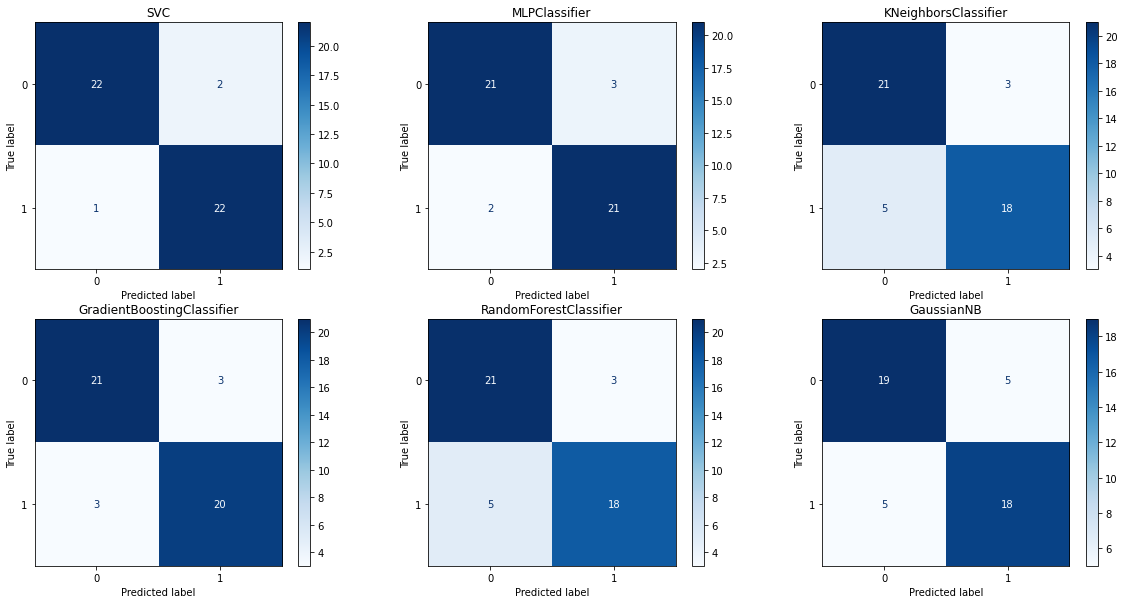

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(x_train, y_train)

    plot_confusion_matrix(cls, 
                          x_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')#,
                        # display_labels=Scaled_data['Classification'
    ax.title.set_text(type(cls).__name__)
    
    r = cls.predict(x_test)
    cm = confusion_matrix(y_test,r)
    tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
    efficiency = (tp+tn)/ (tp+tn+fp+fn)
    completness = (tp)/(fp+tp)
   #rows.append([r, cls + 1])
    #acc = accuracy_score(y_test_tot,r)

    print(efficiency,completness,type(cls).__name__)
    
   # print(type(cls).__name__)
#plt.tight_layout()  
#plt.show()

In [7]:
test =[0.1,0.15]


In [8]:
# error_rfc_for = []
# accuracy_for = []
# for k in range (10,200,20):
#     for N in range (3,8,1):
        
#         ForestN = RandomForestClassifier(n_estimators=k,max_features=N)
#         ForestN.fit(x_train,y_train)
#         y_pred = cross_val_predict(ForestN,x_test,y_test,cv = 5)
        
#         error_rfc_for.append([np.sqrt(mean_squared_error(y_pred,y_test)),k,N])
#         accuracy_for.append([accuracy_score(y_pred,y_test),k,N])

In [9]:
# print(np.max(error_rfc_for, axis=0))
# np.max(accuracy_for, axis=0)

In [10]:
# ForestN = RandomForestClassifier(n_estimators=191,max_features=16)
# ForestN.fit(x_train,y_train)

# y_pred = cross_val_predict(ForestN,x_train,y_train,cv = 5)
# acc = accuracy_score(y_pred,y_train)
# acc
# y_pred_2 = ForestN.predict(Scaled_data_2)
# acc_2 = accuracy_score(y_pred_2,mode)
# acc,acc_2

In [11]:
# for cls, ax in zip(classifiers, axes.flatten()):
#     cls.fit(x_train, y_train)

#     plot_confusion_matrix(cls, 
#                           x_test, 
#                           y_test, 
#                           ax=ax, 
#                           cmap='Blues')#,
#                         # display_labels=Scaled_data['Classification'
#     ax.title.set_text(type(cls).__name__)
    
#     r = cls.predict(x_test)
#     cm = confusion_matrix(y_test,r)
#     tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
#     efficiency = (tp+tn)/ (tp+tn+fp+fn)
#     completness = (tp)/(fp+tp)
#    #rows.append([r, cls + 1])
#     #acc = accuracy_score(y_test_tot,r)

#     print(efficiency,completness,type(cls).__name__)

In [12]:
# RandomForestClassifier?


In [13]:
NN = MLPClassifier(solver='adam',max_iter=2500)
NN.fit(x_train,y_train)
NN_pred = NN.predict(x_test)

acc_NN_split = accuracy_score(y_test,NN_pred)
NN_pred_tot = NN.predict(x_train)

acc_NN_tot = accuracy_score(y_train,NN_pred_tot)

acc_NN_split,acc_NN_tot

(0.9148936170212766, 0.8436018957345972)

In [14]:
knc = KNeighborsClassifier(n_neighbors=3,n_jobs=1)
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)
#pred_knc_2 = knc.predict(imputed_XR)
acc_knc = accuracy_score(y_test,pred_knc)
acc_knc

0.8297872340425532

In [15]:
error_knc = []
accuracy_knc = []
for k in range (1,14,1):
    for N in range (-2,4,3):
        
        kncN = KNeighborsClassifier(n_neighbors=k,n_jobs=N)
        kncN.fit(x_train,y_train)
        y_pred = kncN.predict(x_test)
        #y_pred = cross_val_predict(kncN,x_test,y_test,cv = 5)
        
        error_knc.append([np.sqrt(mean_squared_error(y_pred,y_test)),k,N])
        accuracy_knc.append([accuracy_score(y_pred,y_test),k,N])


#(accuracy_knc)

In [16]:
np.max(accuracy_knc,axis=0)

array([ 0.89361702, 13.        ,  1.        ])

In [17]:


#forest.fit(x_train, y_train)

print('Training accuracy:', np.mean(knc.predict(x_train) == y_train)*100)
print('Test accuracy:', np.mean(knc.predict(x_test) == y_test)*100)

#importance_vals = forest.feature_importances_
#print(importance_vals)

Training accuracy: 87.44075829383885
Test accuracy: 82.97872340425532


In [18]:
from mlxtend.evaluate import feature_importance_permutation
from sklearn.datasets import make_classification



In [19]:
forest = RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0)

forest.fit(x_train, y_train)

print('Training accuracy:', np.mean(forest.predict(x_train) == y_train)*100)
print('Test accuracy:', np.mean(forest.predict(x_test) == y_test)*100)

importance_vals = forest.feature_importances_
print(importance_vals)

Training accuracy: 99.76303317535546
Test accuracy: 82.97872340425532
[0.13191933 0.08951329 0.10005249 0.06634827 0.12838249 0.12376512
 0.08253991 0.10349755 0.07527545 0.0987061 ]


In [20]:
# error_for = []
# accuracy_for = []
# for k in range (50,150,25):
#     for i in range (5, 30,5):
#         forestN = RandomForestClassifier(n_estimators=k, max_depth=i)

#         forestN.fit(x_train,y_train)
#         y_pred = forestN.predict(x_test)
#        # y_pred = cross_val_predict(ForestN,x_test,y_test,cv = 5)
#         acc_forest = accuracy_score(y_test,y_pred)

#         error_for.append([np.sqrt(mean_squared_error(y_pred,y_test)),acc_forest,i,k])
        
# plt.plot(range(1,201,10),error_for)    

error_for = []
accuracy_for = []
for k in range (25,151,25):
    for N in range (5,30,5):
        
        ForestN = RandomForestClassifier(n_estimators=k,max_depth=N,random_state=0)
        ForestN.fit(x_train,y_train)
        y_pred = ForestN.predict(x_test)
        #y_pred = cross_val_predict(ForestN,x_test,y_test,cv = 5)
        
        error_for.append([np.sqrt(mean_squared_error(y_pred,y_test)),k,N])
        accuracy_for.append([accuracy_score(y_pred,y_test),k,N])


#(accuracy_for)


In [21]:
np.max(accuracy_for,axis=0)

array([  0.87234043, 150.        ,  25.        ])

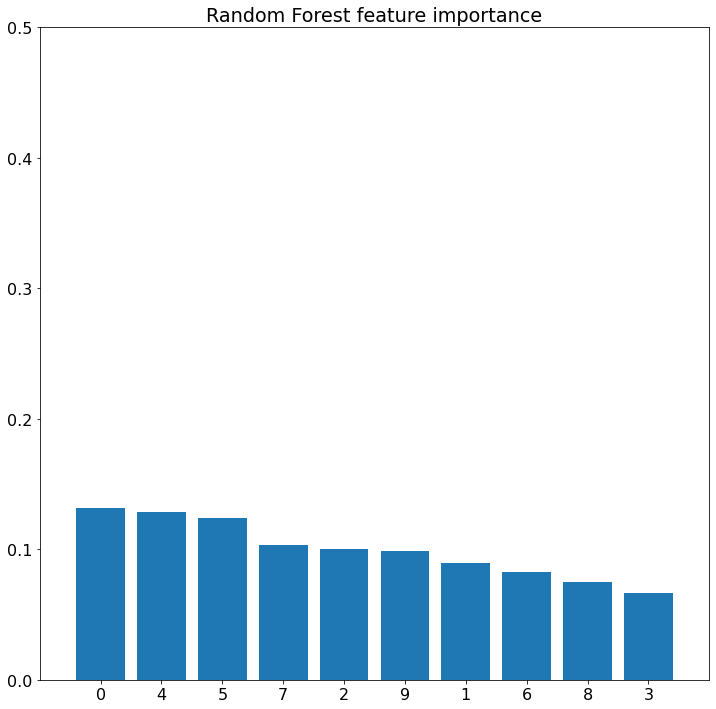

In [22]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 16})

plt.title("Random Forest feature importance")
plt.bar(range(Scaled_data_2.shape[1]), importance_vals[indices], align="center")
plt.xticks(range(Scaled_data_2.shape[1]), indices)
plt.xlim([-1, Scaled_data_2.shape[1]])
plt.ylim([0, 0.5])
plt.show()

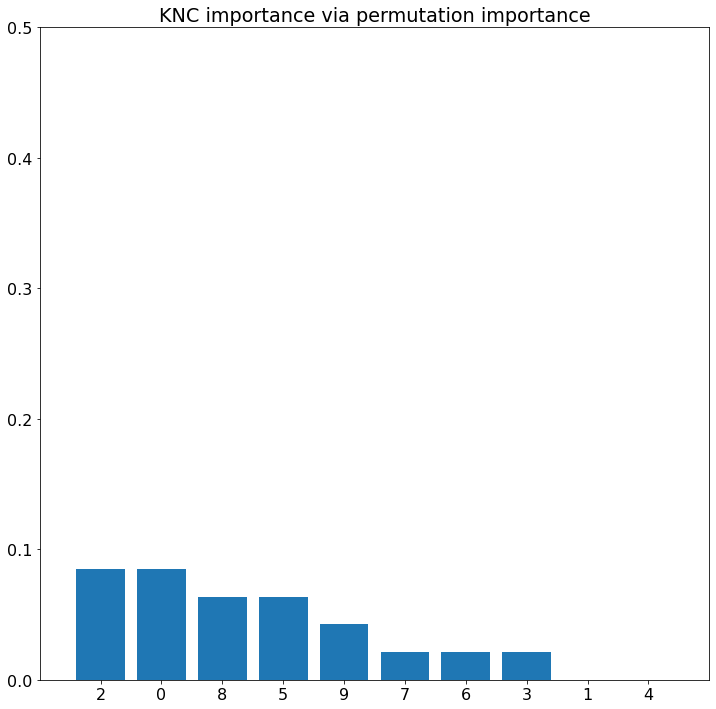

In [23]:
imp_vals, _ = feature_importance_permutation(
    predict_method=knc.predict, 
    X=x_test,
    y=y_test,
    metric='accuracy',
    num_rounds=1,
    seed=1)

imp_vals
indices = np.argsort(imp_vals)[::-1]
plt.figure(figsize = (12,12))
plt.title("KNC importance via permutation importance")
plt.bar(range(Scaled_data_2.shape[1]), imp_vals[indices])
plt.xticks(range(Scaled_data_2.shape[1]), indices)
plt.xlim([-1, Scaled_data_2.shape[1]])
plt.ylim([0, 0.5])
plt.show()

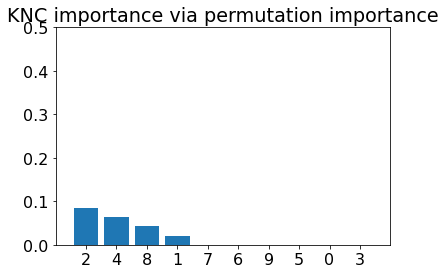

In [24]:
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=x_test,
    y=y_test,
    metric='accuracy',
    num_rounds=1,
    seed=1)

imp_vals

indices = np.argsort(imp_vals)[::-1]
plt.figure()
plt.title("KNC importance via permutation importance")
plt.bar(range(Scaled_data_2.shape[1]), imp_vals[indices])
plt.xticks(range(Scaled_data_2.shape[1]), indices)
plt.xlim([-1, Scaled_data_2.shape[1]])
plt.ylim([0, 0.5])
plt.show()

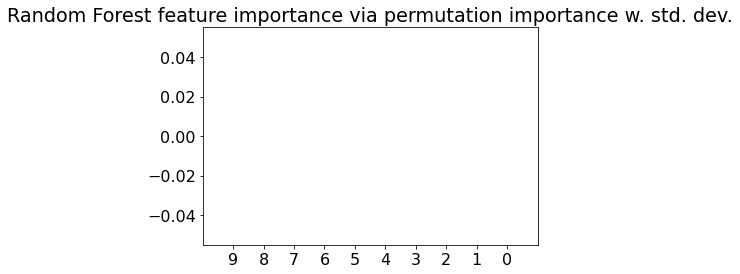

In [25]:
imp_vals, imp_all = feature_importance_permutation(
    predict_method=knc.predict, 
    X=x_test,
    y=x_test,
    metric='accuracy',
    num_rounds=10,
    seed=1)


std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance w. std. dev.")
plt.bar(range(Scaled_data_2.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(Scaled_data_2.shape[1]), indices)
plt.xlim([-1, Scaled_data_2.shape[1]])
plt.show()

In [26]:
knc = KNeighborsClassifier(n_neighbors=2,n_jobs=1)
knc.fit(Scaled_data_2,mode)
pred_knc = knc.predict(Scaled_data_2)
#pred_knc_2 = knc.predict(imputed_XR)
acc_knc = accuracy_score(mode,pred_knc)
acc_knc

0.8997867803837953

In [27]:
error_knc = []
accuracy_knc = []
for k in range (1,14,1):
    for N in range (-2,4,3):
        
        kncN = KNeighborsClassifier(n_neighbors=k,n_jobs=N)
        kncN.fit(Scaled_data_2,mode)
        pred_knc = kncN.predict(Scaled_data_2)
            #y_pred = cross_val_predict(kncN,x_test,y_test,cv = 5)
        
        error_knc.append([np.sqrt(mean_squared_error(pred_knc,mode)),k,N])
        accuracy_knc.append([accuracy_score(pred_knc,mode),k,N])

accuracy_knc
#(accuracy_knc)

[[1.0, 1, -2],
 [1.0, 1, 1],
 [0.8997867803837953, 2, -2],
 [0.8997867803837953, 2, 1],
 [0.8848614072494669, 3, -2],
 [0.8848614072494669, 3, 1],
 [0.8571428571428571, 4, -2],
 [0.8571428571428571, 4, 1],
 [0.8486140724946695, 5, -2],
 [0.8486140724946695, 5, 1],
 [0.8315565031982942, 6, -2],
 [0.8315565031982942, 6, 1],
 [0.8166311300639659, 7, -2],
 [0.8166311300639659, 7, 1],
 [0.8208955223880597, 8, -2],
 [0.8208955223880597, 8, 1],
 [0.814498933901919, 9, -2],
 [0.814498933901919, 9, 1],
 [0.8230277185501066, 10, -2],
 [0.8230277185501066, 10, 1],
 [0.814498933901919, 11, -2],
 [0.814498933901919, 11, 1],
 [0.8230277185501066, 12, -2],
 [0.8230277185501066, 12, 1],
 [0.8123667377398721, 13, -2],
 [0.8123667377398721, 13, 1]]

In [28]:
forest = RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0)

forest.fit(Scaled_data_2,mode)

print('Training accuracy:', np.mean(forest.predict(Scaled_data_2) == mode)*100)
print('Test accuracy:', np.mean(forest.predict(x_test) == y_test)*100)

importance_vals = forest.feature_importances_
print(importance_vals)

Training accuracy: 98.72068230277186
Test accuracy: 100.0
[0.13032893 0.09565489 0.11075849 0.06531521 0.12649861 0.1294102
 0.08964807 0.08471178 0.06775275 0.09992107]


In [29]:
error_for = []
accuracy_for = []
for k in range (25,151,25):
    for N in range (5,30,5):
        
        ForestN = RandomForestClassifier(n_estimators=k,max_depth=N,random_state=0)
        ForestN.fit(Scaled_data_2,mode)
        y_pred = ForestN.predict(Scaled_data_2)
        #y_pred = cross_val_predict(ForestN,x_test,y_test,cv = 5)
        
        error_for.append([np.sqrt(mean_squared_error(y_pred,mode)),k,N])
        accuracy_for.append([accuracy_score(y_pred,mode),k,N])

In [30]:
accuracy_for

[[0.8955223880597015, 25, 5],
 [0.9872068230277186, 25, 10],
 [0.997867803837953, 25, 15],
 [0.997867803837953, 25, 20],
 [0.997867803837953, 25, 25],
 [0.9104477611940298, 50, 5],
 [0.9936034115138592, 50, 10],
 [1.0, 50, 15],
 [1.0, 50, 20],
 [1.0, 50, 25],
 [0.9040511727078892, 75, 5],
 [0.9957356076759062, 75, 10],
 [1.0, 75, 15],
 [1.0, 75, 20],
 [1.0, 75, 25],
 [0.9019189765458422, 100, 5],
 [0.9957356076759062, 100, 10],
 [1.0, 100, 15],
 [1.0, 100, 20],
 [1.0, 100, 25],
 [0.8976545842217484, 125, 5],
 [0.9957356076759062, 125, 10],
 [1.0, 125, 15],
 [1.0, 125, 20],
 [1.0, 125, 25],
 [0.9019189765458422, 150, 5],
 [0.9957356076759062, 150, 10],
 [1.0, 150, 15],
 [1.0, 150, 20],
 [1.0, 150, 25]]